Engy-5050 Spring 2022 UMass Lowell; Prof. V. F. de Almeida **14Jan2022**

# 02. Neutron Diffusion from a "Plane" Source
$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\fvec}{\boldsymbol{\mathsf{f}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\normal}{\boldsymbol{n}}
  \newcommand{\flux}{\boldsymbol{q}}
  \newcommand{\ihat}{\hat{\boldsymbol{i}}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
  \newcommand{\Reals}{\mathbb{R}}
  \newcommand{\thetavec}{\boldsymbol{\theta}}
  \newcommand{\Ecal}{\mathcal{E}}
$

---

## Table of Contents<a id="toc"></a>
* [Objectives](#obj)
1. [Poisson Problem with Natural/Natural Boundary Conditions](#p1)
1. [Alternative Problem Statement](#p2)
1. [Galerkin's Method w/ Finite Element Basis Functions](#p3)
1. ["Plane Source in a Symmetric Infinite Domain"](#sym-case)
   + [Data](#data-sym)
   + [Finite Element Lagrange Basis Functions](#fembf-sym)
   + [Results](#results-sym)
1. ["Plane Source in an Unsymmetric Infinite Domain"](#unsym-case)
   + [Data](#data-unsym)
   + [Finite Element Lagrange Basis Functions](#fembf-unsym)
   + [Results](#results-unsym)
1. ["Plane Source" in a Finite Domain w/ Vacuum Boundary](#vac-case)
   + [Data](#data-vac)
   + [Finite Element Lagrange Basis Functions](#fembf-vac)
   + [Results](#results-vac)
---

## [Objectives](#toc)<a id="obj"></a>

 + Solve the 1-D, Cartesian coordinates, neutron diffusion from a plane source problem using multiple regions.

## [Boundary-Value Problem Statement](#toc)<a id="p1"></a>

Solve the heterogeneous spatial neutron flux magnitude diffusion problem. Find $u_1:[s,b]\subset\Reals\rightarrow\Reals$, $u_2:[-s,s]\subset\Reals\rightarrow\Reals$, $u_3:[a,-s]\subset\Reals\rightarrow\Reals$
such that:

\begin{align*}
 -\bigl(-D_1\, u_1'\bigr)'(x) - \Sigma_{a,1}\,u_1(x) + s_0^{(1)} &= 0 \quad\quad \forall \quad\quad x\in\ ]s,b[, \\
 -\bigl(-D_2\, u_2'\bigr)'(x) - \Sigma_{a,2}\,u_2(x) + s_0^{(2)} &= 0 \quad\quad \forall \quad\quad x\in\ ]-s,s[, \\
 -\bigl(-D_3\, u_3'\bigr)'(x) - \Sigma_{a,3}\,u_3(x) + s_0^{(3)} &= 0 \quad\quad \forall \quad\quad x\in\ ]a,-s[, \\
 q_{3,n}(a) &= q_{3,na}, \\
 q_{1,n}(b) &= q_{1,nb}, \\
 u_1(s) &= u_2(s), \\
 u_3(-s) &= u_2(-s), \\
 q_{1,n}(s) &= q_{2,n}(s), \\
 q_{3,n}(-s) &= q_{2,n}(-s), \\
\end{align*}
   
Given data: diffusion coefficients, $D$, macroscopic absorption cross sections, $\Sigma_a$, source $s_0$, boundary conditions of normal flux, and continuity conditions at the interfaces (both normal flux and solution). Where $q_{i,n}(x) = \flux_i(x)\cdot\normal(x) = -D_i\,u_i'(x)\,\ihat \cdot \normal(x) \ \forall \ i=1,2,3$.

## [Alternative Boundary-Value Problem Statement](#toc)<a id="p2"></a>

Solve the equivalent heterogeneous spatial neutron flux magnitude diffusion problem. Find $u:[a,b]\subset\Reals\rightarrow\Reals$ such that:

\begin{align*}
 -\bigl(-D(x)\, u'\bigr)'(x) - \Sigma_a(x)\,u(x) + s_0(x) &= 0 \quad\quad \forall \quad\quad x\in\ ]a,b[, \\
 q_n(a) &= q_{na}, \\
 q_n(b) &= q_{nb}, \\
\end{align*}
   
Given data: diffusion coefficient, $D(x)$, macroscopic absorption cross section, $\Sigma_a(x)$, source $s_0(x)$, and normal flux boundary conditions. Where $q_n(x) = \flux(x)\cdot\normal(x) = -D(x)\,u_i'(x)\,\ihat \cdot \normal(x)$.

## [Galerkin Method (or Rayleigh-Ritz) w/ Finite Element Basis Functions](#toc)<a id="p3"></a>

The Galerkin weak formulation is as follows. Find $u \in H^1\!\bigl([a,b]\bigr)$ so that 

\begin{align*}
\bigl(-D\, u',v'\bigr) - \bigl(\Sigma_a\,u,v\bigr) + \bigl(s_0,v\bigr) - q_n(a)\,v(a) - q_n(b)\,v(b) &= 0 \quad\quad \forall \quad\quad v \in H^1\!\bigl([a,b]\bigr), 
\end{align*}

where $H^1\!\bigl([a,b]\bigr) := \bigl\{ u:[a,b]\subset\Reals\rightarrow \Reals \mid \bigl(u',u'\bigr) + \bigl(u,u\bigr) < \infty\bigr\}$. Because $u$ and $v$ belong to the same space of functions, this variational form is called the Galerkin's variational form. Choosing a finite dimensional
subspace of $H^1\!\bigl([a,b]\bigr)$, say $V_N([a,b]) := \bigl\{ u_N = \sum\limits_{i=1}^N\,c_i\,\phi_i \bigr\} \subset H^1\!\bigl([a,b]\bigr)$, where $\{\phi_i\mid i=1\ldots,N\}$ is a basis of $V_N(a,b)$, the coefficients $\cvec := \{c_i\mid i=1,\ldots,N\}$ can be computed by solving the linear system of algebraic equations

\begin{equation*}
 \overset{(N\times N)}{\Amtrx}\,\overset{(N\times 1)}{\cvec} = \overset{(N\times 1)}\bvec ,
\end{equation*}

where:
  + $A_{i,j} = (D\,\phi'_j,\phi'_i) + (\Sigma_a\,\phi_j,\phi_i) $
  + $b_i = (s_0,\phi_i) - q_{na}\,\phi_i(a) - q_{nb}\,\phi_i(b)$
  
Note: this method is identical to the Rayleigh-Ritz method, therefore the approximate solution  $u_N = \sum\limits_{i=1}^N\,c_i\,\phi_i$ is a minimizer of a particular norm (*i.e.* the energy norm).

## ["Plane Source in a Symmetric Infinte Domain"](#toc)<a id="sym-case"></a>

Consider a "thin" planar source surrounded by two identical material regions. The domains extend far away from source. 

The normal flux boundary conditions are as follows:

\begin{align*}
 q_n(\infty) &= 0, \\
 q_n(-\infty) &= 0.
\end{align*}

In [1]:
'''SI units'''
from scipy import constants as unit
unit.second = 1.0
unit.meter = 1.0
unit.cm = unit.centi*unit.meter
unit.mm = unit.milli*unit.meter
unit.um = unit.micro*unit.meter

In [2]:
'''Domain'''
x_a = -80*unit.cm  # infinity
x_b = +80*unit.cm  # infinity
x_s = 0.5*unit.cm  # thickness of source (2*x_s)

In [3]:
'''Domain'''

def show_domain(x_a, x_s, x_b, zoom=3):
    import pyvista as pv
    pv.set_plot_theme('paraview')
    h = 25
    source = pv.Box((-x_s,x_s,-h*x_s,h*x_s,-h*x_s,h*x_s))
    mat_right = pv.Box((x_s,x_b,-h*x_s,h*x_s,-h*x_s,h*x_s))
    mat_left = pv.Box((x_a,-x_s,-h*x_s,h*x_s,-h*x_s,h*x_s))
    
    plo = pv.Plotter(notebook=True, shape=(1,1)) 
    plo.subplot(0,0)
    plo.add_mesh(source, color='red', opacity=1.0,)
    plo.add_mesh(mat_right, color='green', opacity=0.5)
    plo.add_mesh(mat_left, color='tan', opacity=0.5)
    plo.add_axes(xlabel='X', ylabel='Y', zlabel='Z')
    plo.screenshot('domain.png', window_size=(1000,400))
    plo.camera.zoom(zoom)
    cpos = plo.show(window_size=(1000, 400), auto_close=False)
    return plo

In [4]:
plo = show_domain(x_a, x_s, x_b)

ViewInteractiveWidget(height=400, layout=Layout(height='auto', width='100%'), width=1000)

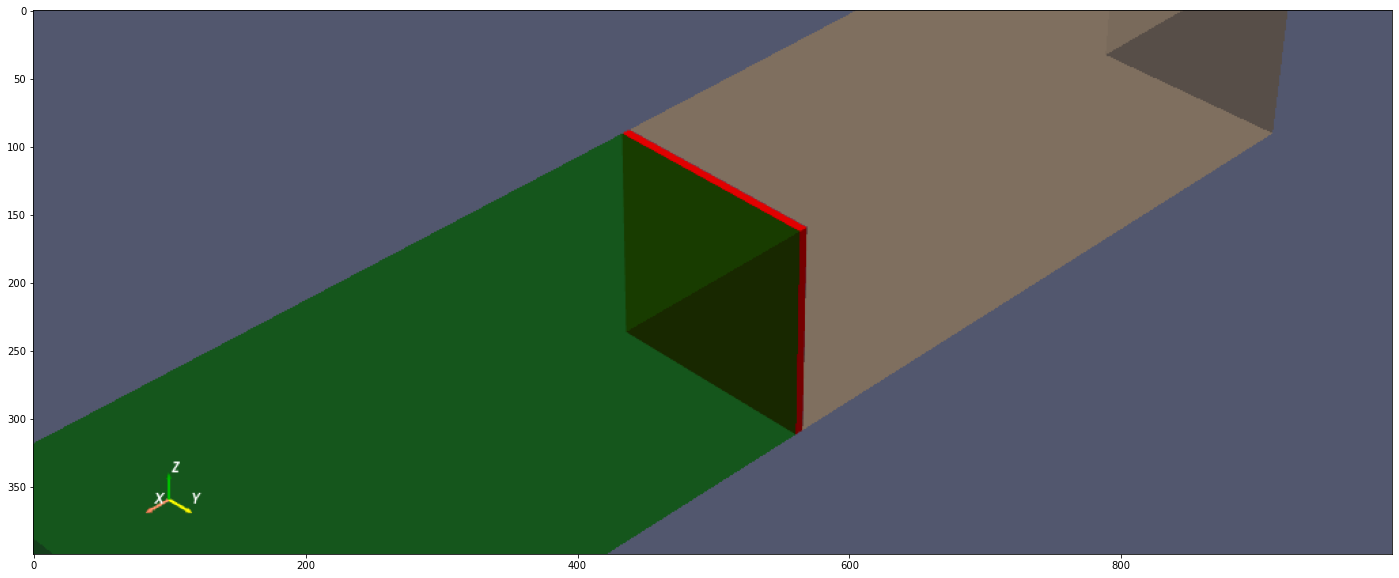

In [5]:
import matplotlib.pyplot as plt
plt.figure(1, figsize=(100, 10))
plt.imshow(plo.image)
plt.show()

### [Data](#toc)<a id="data-sym"></a>

Solve problem with parameter values:

> + a, b, s
> + $D_1$, $\Sigma_{a1}$, $s_{01}$
> + $D_2$, $\Sigma_{a2}$, $s_{02}$
> + $D_3$, $\Sigma_{a3}$, $s_{03}$
> + $q_{na}$, $q_{nb}$


In [6]:
'''Parameters and data'''

# Left side material
diffusion_coeff_3 = 1.0*unit.cm
sigma_a_3 = 0.01/unit.cm
source_3 = 0./unit.cm**3/unit.second

# Right side material
diffusion_coeff_1 = 1.0*unit.cm
sigma_a_1 = 0.01/unit.cm
source_1 = 0./unit.cm**3/unit.second

# Source
diffusion_coeff_2 = 1.5*unit.cm
sigma_a_2 = 0.005/unit.cm
source_2_two_prime = 1./unit.cm**2/unit.second # enforce a given surface source
length = 2*x_s
source_2 = source_2_two_prime/length

# Left normal flux
q_na = 0/unit.cm**2/unit.second
# Right normal flux
q_nb = 0/unit.cm**2/unit.second

In [7]:
print('s_2 [#/cm^3-s] = ', source_2*unit.cm**3*unit.second)

s_2 [#/cm^3-s] =  1.0000000000000002


In [8]:
'''Diffusion lengths'''

import math
diffusion_length_1 = math.sqrt(diffusion_coeff_1/sigma_a_1)
print('L1 [cm] = %2.3e'%(diffusion_length_1/unit.cm))
diffusion_length_2 = math.sqrt(diffusion_coeff_2/sigma_a_2)
print('L2 [cm] = %2.3e'%(diffusion_length_2/unit.cm))
diffusion_length_3 = math.sqrt(diffusion_coeff_3/sigma_a_3)
print('L3 [cm] = %2.3e'%(diffusion_length_3/unit.cm))

L1 [cm] = 1.000e+01
L2 [cm] = 1.732e+01
L3 [cm] = 1.000e+01


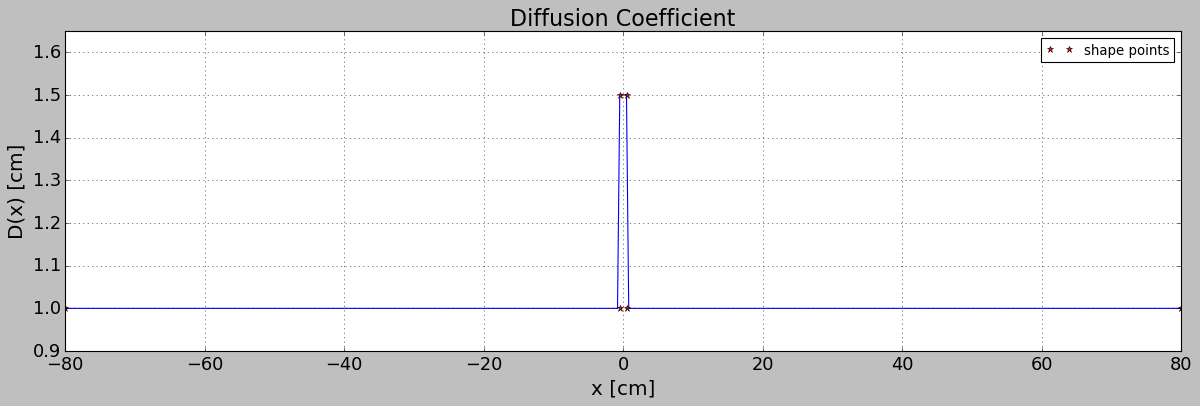

In [9]:
'''Diffusion coefficient function'''
from engy_5310.toolkit import TargetFunction   

shape_pts = [(x_a, diffusion_coeff_3), (-x_s, diffusion_coeff_3), 
             (-x_s, diffusion_coeff_2), (x_s, diffusion_coeff_2), 
             (x_s, diffusion_coeff_1), (x_b, diffusion_coeff_1)]

diffusion_coeff = TargetFunction(shape_pts, type='linear')
  
diffusion_coeff.plot(n_plot_pts=500, show_shape_pts=True, 
                title='Diffusion Coefficient', y_label=r'D(x) [cm]', x_label='x [cm]', 
                x_scale=1/unit.cm, y_scale=1/unit.cm,
                ylim=[min(diffusion_coeff_1, diffusion_coeff_2, diffusion_coeff_3)/unit.cm*.9, 
                      max(diffusion_coeff_1, diffusion_coeff_2, diffusion_coeff_3)/unit.cm*1.1])

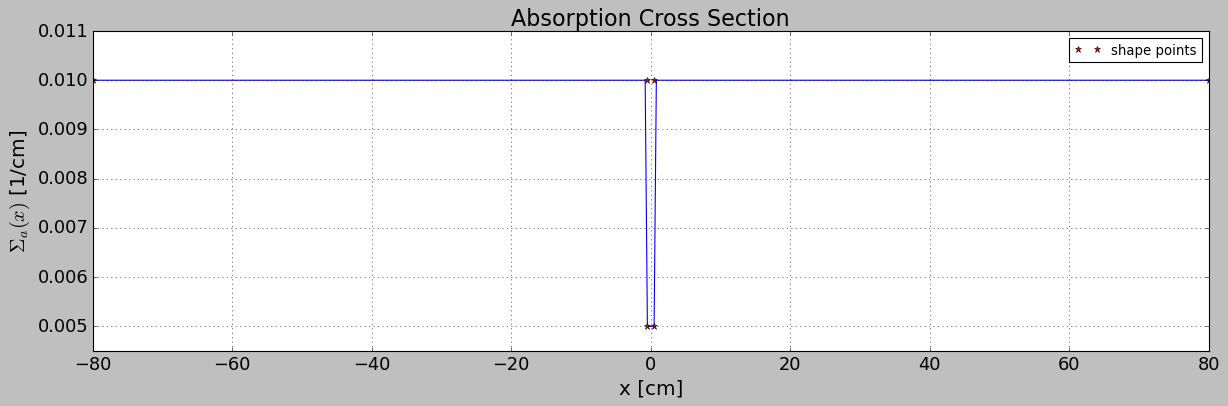

In [10]:
'''Absoption cross section function'''
from engy_5310.toolkit import TargetFunction  

shape_pts = [(x_a, sigma_a_3), (-x_s, sigma_a_3), 
             (-x_s, sigma_a_2), (x_s, sigma_a_2), 
             (x_s, sigma_a_1), (x_b, sigma_a_1)]

sigma_a = TargetFunction(shape_pts, type='linear')
  
sigma_a.plot(n_plot_pts=500, show_shape_pts=True, 
             title='Absorption Cross Section', y_label=r'$\Sigma_a(x)$ [1/cm]', x_label='x [cm]', 
             x_scale=1/unit.cm, y_scale=unit.cm,
             ylim=[min(sigma_a_1, sigma_a_2, sigma_a_3)*unit.cm*.9, 
                   max(sigma_a_1, sigma_a_2, sigma_a_3)*unit.cm*1.1])

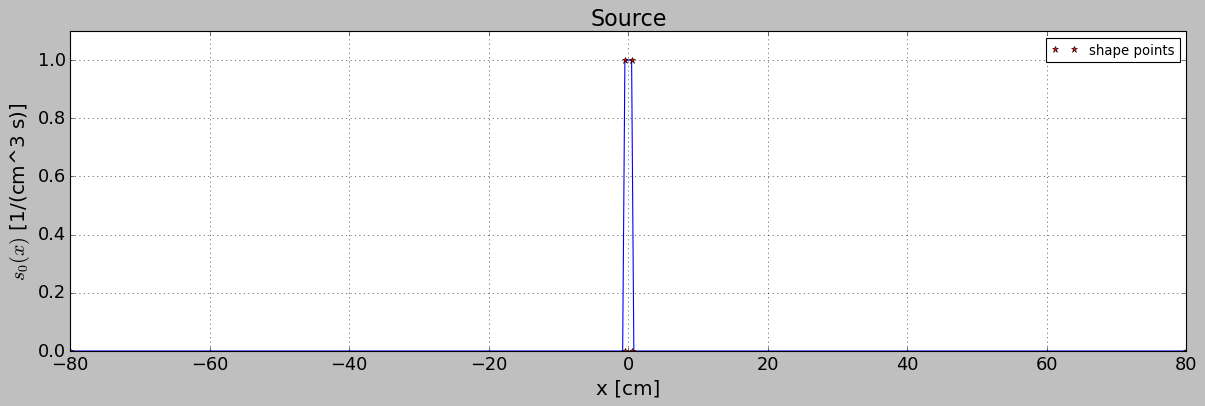

In [11]:
'''Source function'''
from engy_5310.toolkit import TargetFunction  

shape_pts = [(x_a, source_3), (-x_s, source_3), 
             (-x_s, source_2), (x_s, source_2), 
             (x_s, source_1), (x_b, source_1)]

source = TargetFunction(shape_pts, type='linear')
  
source.plot(n_plot_pts=500, show_shape_pts=True, 
             title='Source', y_label=r'$s_0(x)$ [1/(cm^3 s)]', x_label='x [cm]', 
             x_scale=1/unit.cm, y_scale=unit.cm**3*unit.second,
             ylim=[min(source_1, source_2, source_3)*unit.cm**3*unit.second*.9, 
                   max(source_1, source_2, source_3)*unit.cm**3*unit.second*1.1])

### [Finite Element Basis Functions](#toc)<a id="fembf-sym"></a>

Specify basis functions distribution on the material domain and degree.

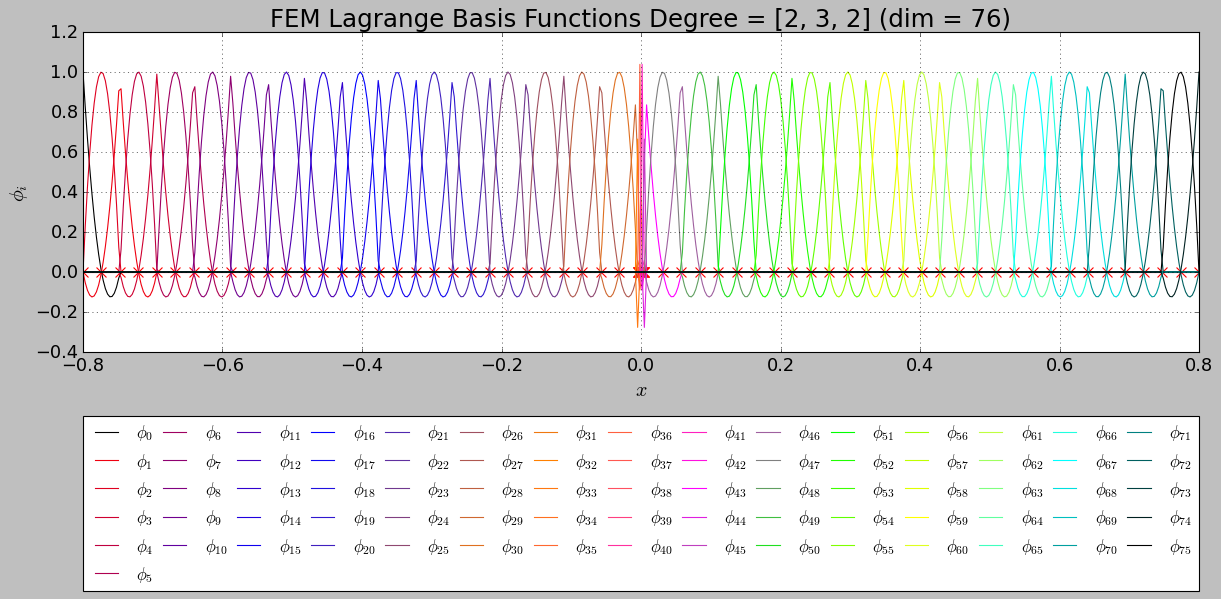

In [12]:
'''Build basis functions'''
from engy_5310.toolkit import LagrangeFEMBasis 

degree = [2,3,2]
n_elem = [15,5,15] # make sure to use an odd number of element in the central source domain

femlb = LagrangeFEMBasis(degree=degree, n_elem=n_elem, x_partition=[x_a, -x_s, x_s, x_b])
femlb.plot(n_plot_pts=500, n_legend_cols=15)

  + $A_{i,j} = (D\,\phi'_j,\phi'_i) + (\Sigma_a\,\phi_j,\phi_i) $

In [13]:
'''Build the matrix of coefficients of the linear system'''

d_mtrx = femlb.inner_product_matrix(diffusion_coeff, "u'", "v'")
sa_mtrx = femlb.inner_product_matrix(sigma_a, 'u', 'v')

a_mtrx = d_mtrx + sa_mtrx

In [14]:
try:    
    from engy_5310.toolkit import matrix_rank
except ModuleNotFoundError:
    assert False, 'You need to provide your own code here. Bailing out.'
    
if matrix_rank(a_mtrx) == min(a_mtrx.shape):
    print('matrix is full rank.')
else:
    print('matrix is rank deficient.')

matrix is full rank.


  + $b_i = (s_0,\phi_i) - q_{na}\,\phi_i(a) - q_{nb}\,\phi_i(b)$

In [15]:
'''Build the load vector'''

s_vec = femlb.inner_product_vector(source, 'v')
#qa_vec = femlb.boundary_inner_product_vector('left', lambda x: q_na, 'v')  # left side inner product is incorrect FIX (TODO)
qb_vec = femlb.boundary_inner_product_vector('right', lambda x: q_nb, 'v')

'''Build load vector (using global basis functions)'''
# Too slow (keep for information)
import numpy as np
n = len(femlb.basis_func_list)
b_vec = np.zeros(n, dtype=np.float64)
for i, phi_i in enumerate(femlb.basis_func_list):
    b_vec[i] = q_na * phi_i(x_a)
    
#b_vec = s_vec - qa_vec - qb_vec
b_vec = s_vec - b_vec - qb_vec

In [16]:
'''Compute coefficients of the finite element basis linear combination'''
import numpy as np
c_star_vec = np.linalg.solve(a_mtrx, b_vec)

In [17]:
'''Build the best approximation function in V_N'''

def u_star(x):
    u = femlb.evaluation_matrix(x)@c_star_vec
    return u

In [18]:
'''Build the best approximation function in V_N'''

def u_prime_star(x):
    u_prime = femlb.evaluation_matrix(x, derivative=True)@c_star_vec
    return u_prime

### [Results](#toc)<a id="results-sym"></a>

Much can be exercised in terms of results by varying the parameters of the problem.

In [19]:
'''Plot solution'''

def plot_solution(x, u_values, q_values, 
                  u_legend='Solution w/ Neumann BC', 
                  q_legend='Flux w/ Neumann BC'):
    
    import matplotlib.pyplot as plt
    (fig, ax1) = plt.subplots(1, figsize=(14, 6))

    ax1.plot(x/unit.cm, u_values*unit.cm**2*unit.second, 'r-', label=u_legend)

    ax1.set_xlabel(r'$x$ [cm]', fontsize=18)
    ax1.set_ylabel(r'$u_h(x)$', fontsize=18, color='red')
    ax1.tick_params(axis='y', labelcolor='red', labelsize=14)
    ax1.tick_params(axis='x', labelsize=14)
    ax1.legend(loc='best', fontsize=12)
    #ax1.set_ylim(0,1)
    ax1.grid(True)

    # create a twin x axis to be shared
    ax2 = ax1.twinx()

    ax2.plot(x/unit.cm, q_values*unit.cm**2*unit.second, 'b-', label=q_legend)

    ax2.set_ylabel(r"$q_h(x)$", fontsize=18, color='blue')
    ax2.tick_params(axis='y', labelcolor='blue', labelsize=14)
    ax2.legend(loc='center right', fontsize=12)
    #ax2.set_ylim(0,2)
    #ax2.grid(True)

    plt.title(r'Galerkin Method with Finite Element Lagrange Basis Functions (n='+str(len(femlb.basis_func_list))+')', fontsize=20)
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()
    print('')

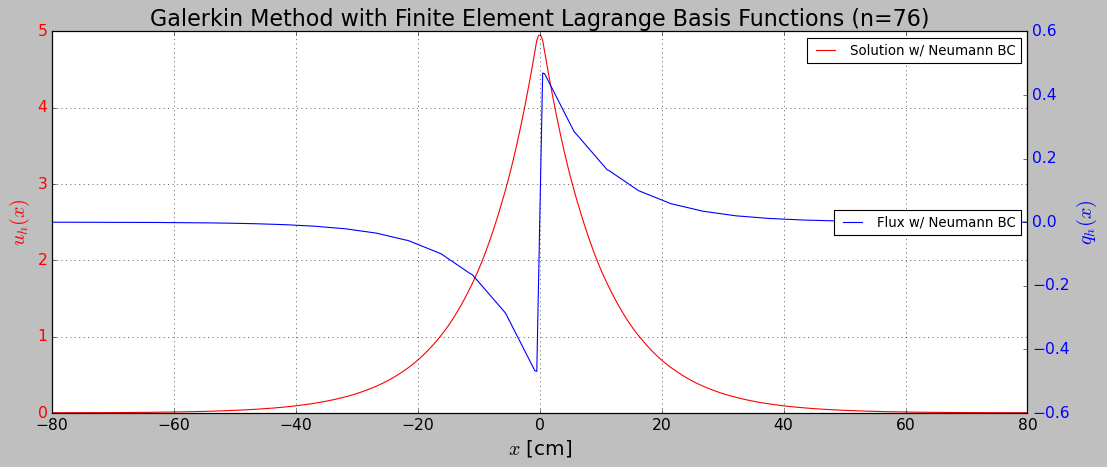

In [20]:
n_pts = 500
x = np.linspace(x_a, x_b, n_pts)
u_values = u_star(x)
q_values = -diffusion_coeff(x)*u_prime_star(x)

plot_solution(x, u_values, q_values)

In [21]:
'''Rayleigh-Ritz solution evaluated at the boundaries'''

np.set_printoptions(precision=5)
print('u^*_N(a) [cm^2/s]= ', u_star(x_a)*unit.cm**2*unit.second, '  u^*_N(b) [cm^2/s]= ', u_star(x_b)*unit.cm**2*unit.second)
print("u^*'_N(a) [cm/s]= ", u_prime_star(x_a)*unit.cm*unit.second, " u^*'_N(b) [cm/s]= ", u_prime_star(x_b)*unit.cm*unit.second)
print('u^*_N(0) [cm^2/s]= ', u_star(0.0)*unit.cm**2*unit.second)
print("u^*'_N(0) [cm/s]= ", u_prime_star(0.0)*unit.cm*unit.second)

u^*_N(a) [cm^2/s]=  [0.00344]   u^*_N(b) [cm^2/s]=  [0.00344]
u^*'_N(a) [cm/s]=  [-0.0174]  u^*'_N(b) [cm/s]=  [0.0174]
u^*_N(0) [cm^2/s]=  [4.95775]
u^*'_N(0) [cm/s]=  [-2.6037e-10]


For an infinitesimally thin source (class notes), the limit obtained is $\phi_{1} (0) = \frac{s_0^"}{2}\,\frac{L_1}{D_1}$.

In [22]:
'''Error on u_1(0) for a thin source'''

phi_1_0 = source_2_two_prime/2*diffusion_length_1/diffusion_coeff_1
print('(u_star(0)-phi_1(0)) relative error [%]= ', abs(u_star(0)-phi_1_0)/phi_1_0*100)

(u_star(0)-phi_1(0)) relative error [%]=  [0.84504]


In [23]:
u_star(0)/phi_1_0

array([0.99155])

In [24]:
phi_1_0

50000.0

This shows how close the value of $u$ at the origin is to the limiting case of a thin source (class notes).

For an infinitesimally thin source, the limit obtained is $q_{1n}(0) =  \frac{s_0^"}{2}$.

In [25]:
'''Error on q_n1(0) for a thin source'''

q_1_n_0 = - source_2_two_prime/2
print('(q_1n(0)-q_1n_thin(0)) relative error [%]= ', abs(-(-diffusion_coeff_1*u_prime_star(0))-q_1_n_0)/q_1_n_0*100)

(q_1n(0)-q_1n_thin(0)) relative error [%]=  [-100.]


This shows how close the value of $q_{1n}$ at the origin is to the limiting case of a thin source (class notes). This limit cannot be reproduced, hence the large error.

In [26]:
'''Flux at left boundary'''

print('q_na given    [cm2/s]= ', q_na)
print('q_na computed [cm2/s]= ', -(-diffusion_coeff(x_a)*u_prime_star(x_a))*unit.cm**2*unit.second)
#print('flux error [%]= ',(diffusion_coeff(x_a)*u_prime_star(x_a) - q_na)/q_na*100*unit.cm**2*unit.second)

q_na given    [cm2/s]=  0.0
q_na computed [cm2/s]=  [-1.73963e-06]


In [27]:
'''Flux at right boundary'''

print('q_nb given    [cm^2/s]= ', q_nb)
print('q_nb computed [cm^2/s]= ', -diffusion_coeff(x_b)*u_prime_star(x_b)*unit.cm**2*unit.second)
#print('flux error [%]= ',(-diffusion_coeff(x_b)*u_prime_star(x_b) - q_nb)/q_nb*100*unit.cm**2*unit.second)

q_nb given    [cm^2/s]=  0.0
q_nb computed [cm^2/s]=  [-1.73963e-06]


In [28]:
x_vec = np.linspace(x_a, x_b, 40)
u_n_vec = u_star(x_vec)*unit.cm**2*unit.second
q_N_vec = -diffusion_coeff(x_vec)*u_prime_star(x_vec)*unit.cm**2*unit.second

print('x [cm]        u_n [#/cm^2/s]    q_N [#/cm^2/s]')
for (x, u_n, q_N) in zip(x_vec, u_n_vec, q_N_vec):
    print('%+2.5e   %+2.5e     %+2.5e'%(x/unit.cm, u_n, q_N))

x [cm]        u_n [#/cm^2/s]    q_N [#/cm^2/s]
-8.00000e+01   +3.44102e-03     +1.73963e-06
-7.58974e+01   +3.73579e-03     -1.45443e-04
-7.17949e+01   +4.66636e-03     -3.18610e-04
-6.76923e+01   +6.38699e-03     -5.42776e-04
-6.35897e+01   +9.20219e-03     -8.42463e-04
-5.94872e+01   +1.36131e-02     -1.30787e-03
-5.53846e+01   +2.03280e-02     -2.01907e-03
-5.12821e+01   +3.04748e-02     -3.06279e-03
-4.71795e+01   +4.58109e-02     -4.56344e-03
-4.30769e+01   +6.91066e-02     -6.79319e-03
-3.89744e+01   +1.04193e-01     -1.04406e-02
-3.48718e+01   +1.56860e-01     -1.58638e-02
-3.07692e+01   +2.36101e-01     -2.37648e-02
-2.66667e+01   +3.55990e-01     -3.49591e-02
-2.25641e+01   +5.37474e-01     -5.35146e-02
-1.84615e+01   +8.09743e-01     -8.17148e-02
-1.43590e+01   +1.21878e+00     -1.23193e-01
-1.02564e+01   +1.83585e+00     -1.82735e-01
-6.15385e+00   +2.77216e+00     -2.73718e-01
-2.05128e+00   +4.17976e+00     -4.19900e-01
+2.05128e+00   +4.17976e+00     +4.19900e-01
+6.15385

In [29]:
x_vec

array([-0.8    , -0.75897, -0.71795, -0.67692, -0.6359 , -0.59487,
       -0.55385, -0.51282, -0.47179, -0.43077, -0.38974, -0.34872,
       -0.30769, -0.26667, -0.22564, -0.18462, -0.14359, -0.10256,
       -0.06154, -0.02051,  0.02051,  0.06154,  0.10256,  0.14359,
        0.18462,  0.22564,  0.26667,  0.30769,  0.34872,  0.38974,
        0.43077,  0.47179,  0.51282,  0.55385,  0.59487,  0.6359 ,
        0.67692,  0.71795,  0.75897,  0.8    ])

In [30]:
u_n_vec

array([3.44102e-03, 3.73579e-03, 4.66636e-03, 6.38699e-03, 9.20219e-03,
       1.36131e-02, 2.03280e-02, 3.04748e-02, 4.58109e-02, 6.91066e-02,
       1.04193e-01, 1.56860e-01, 2.36101e-01, 3.55990e-01, 5.37474e-01,
       8.09743e-01, 1.21878e+00, 1.83585e+00, 2.77216e+00, 4.17976e+00,
       4.17976e+00, 2.77216e+00, 1.83585e+00, 1.21878e+00, 8.09743e-01,
       5.37474e-01, 3.55990e-01, 2.36101e-01, 1.56860e-01, 1.04193e-01,
       6.91066e-02, 4.58109e-02, 3.04748e-02, 2.03280e-02, 1.36131e-02,
       9.20219e-03, 6.38699e-03, 4.66636e-03, 3.73579e-03, 3.44102e-03])

In [31]:
q_N_vec

array([ 1.73963e-06, -1.45443e-04, -3.18610e-04, -5.42776e-04,
       -8.42463e-04, -1.30787e-03, -2.01907e-03, -3.06279e-03,
       -4.56344e-03, -6.79319e-03, -1.04406e-02, -1.58638e-02,
       -2.37648e-02, -3.49591e-02, -5.35146e-02, -8.17148e-02,
       -1.23193e-01, -1.82735e-01, -2.73718e-01, -4.19900e-01,
        4.19900e-01,  2.73718e-01,  1.82735e-01,  1.23193e-01,
        8.17148e-02,  5.35146e-02,  3.49591e-02,  2.37648e-02,
        1.58638e-02,  1.04406e-02,  6.79319e-03,  4.56344e-03,
        3.06279e-03,  2.01907e-03,  1.30787e-03,  8.42463e-04,
        5.42776e-04,  3.18610e-04,  1.45443e-04, -1.73963e-06])

In [32]:
'''Save text file with values'''

x_vec = np.linspace(x_a, x_b, 5000)
u_n_vec = u_star(x_vec)*unit.cm**2*unit.second
q_N_vec = -diffusion_coeff(x_vec)*u_prime_star(x_vec)*unit.cm**2*unit.second

np.savetxt('data/plane-source-sym-inf.txt', (x_vec/unit.cm, u_n_vec, q_N_vec), delimiter=' ', fmt='%2.6e') 

# For reading do: (x,u,q) = np.loadtxt('line-source-inf.txt')

## ["Plane Source in an Unsymmetric Infinite Domain"](#toc)<a id="unsym-case"></a>

Consider a "thin" planar source surrounded by two different material regions. The domains extend far away from source. 

The normal flux boundary conditions are as follows:

\begin{align*}
 q_n(\infty) &= 0, \\
 q_n(-\infty) &= 0.
\end{align*}

In [33]:
'''Domain'''
x_a = -80*unit.cm  # infinity
x_b = +80*unit.cm  # infinity
x_s = 0.5*unit.cm  # thickness of source (2*x_s)

In [34]:
plo = show_domain(x_a, x_s, x_b)

ViewInteractiveWidget(height=400, layout=Layout(height='auto', width='100%'), width=1000)

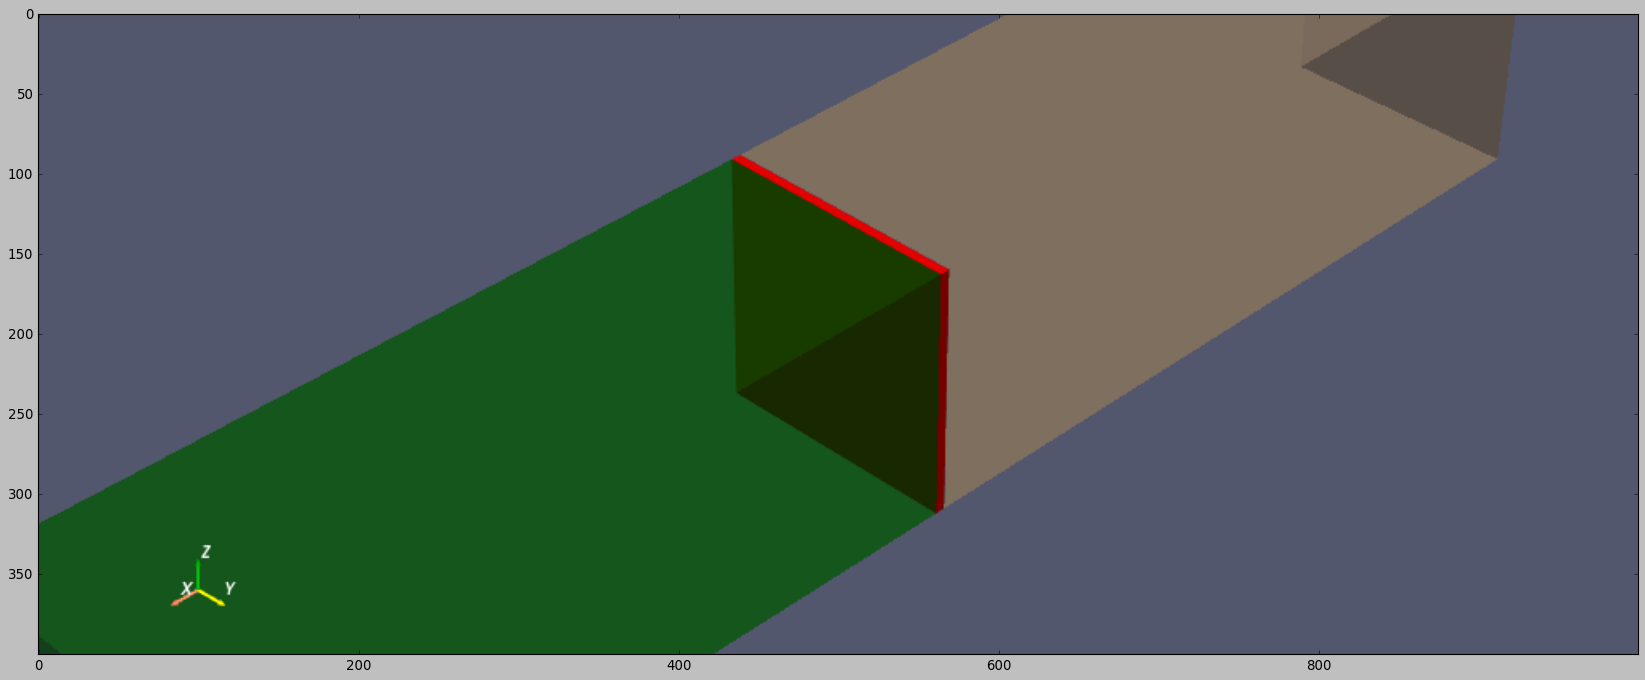

In [35]:
import matplotlib.pyplot as plt
plt.figure(1, figsize=(100, 10))
plt.imshow(plo.image)
plt.show()

### [Data](#toc)<a id="data-unsym"></a>

Solve problem with parameter values:

> + a, b, s
> + $D_1$, $\Sigma_{a1}$, $s_{01}$
> + $D_2$, $\Sigma_{a2}$, $s_{02}$
> + $D_3$, $\Sigma_{a3}$, $s_{03}$
> + $q_{na}$, $q_{nb}$


In [36]:
'''Parameters and data'''

# Left side material
diffusion_coeff_3 = 1.0*unit.cm
sigma_a_3 = 0.04/unit.cm
source_3 = 0.1/unit.cm**3/unit.second

# Right side material
diffusion_coeff_1 = 1.4*unit.cm
sigma_a_1 = 0.01/unit.cm
source_1 = 0./unit.cm**3/unit.second

# Source
diffusion_coeff_2 = 1.5*unit.cm
sigma_a_2 = 0.005/unit.cm
source_2_two_prime = 1./unit.cm**2/unit.second # enforce a given surface source
length = 2*x_s
source_2 = source_2_two_prime/length

# Left normal flux
q_na = 0.0*unit.cm**2/unit.second
# Right normal flux
q_nb = 0.0*unit.cm**2/unit.second

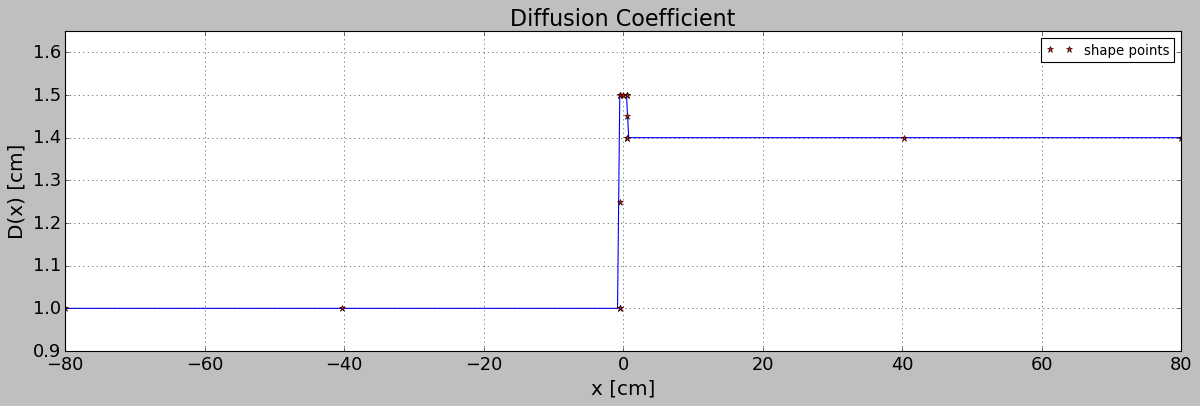

In [37]:
'''Diffusion coefficient function'''
from engy_5310.toolkit import TargetFunction   

a = np.linspace(x_a, -x_s, 3)
a_pts = [(x, diffusion_coeff_3) for x in a]

b = np.linspace(diffusion_coeff_3, diffusion_coeff_2, 3)
b_pts = [(-x_s, y) for y in b]

c = np.linspace(-x_s, x_s, 3)
c_pts = [(x, diffusion_coeff_2) for x in c]

d = np.linspace(diffusion_coeff_2, diffusion_coeff_1, 3)
d_pts = [(x_s, y) for y in d]

e = np.linspace(x_s, x_b, 3)
e_pts = [(x, diffusion_coeff_1) for x in e]

shape_pts = a_pts + b_pts + c_pts + d_pts + e_pts

#shape_pts = [(x_a, diffusion_coeff_3), ((x_a-x_s)/2, diffusion_coeff_3),  (-x_s, diffusion_coeff_3), 
#             (-x_s, diffusion_coeff_2), (x_s, diffusion_coeff_2), 
#             (x_s, diffusion_coeff_1), (x_b, diffusion_coeff_1)]

diffusion_coeff = TargetFunction(shape_pts, type='linear')
  
diffusion_coeff.plot(n_plot_pts=500, show_shape_pts=True, 
                title='Diffusion Coefficient', y_label=r'D(x) [cm]', x_label='x [cm]', 
                x_scale=1/unit.cm, y_scale=1/unit.cm,
                ylim=[min(diffusion_coeff_1, diffusion_coeff_2, diffusion_coeff_3)/unit.cm*.9, 
                      max(diffusion_coeff_1, diffusion_coeff_2, diffusion_coeff_3)/unit.cm*1.1])

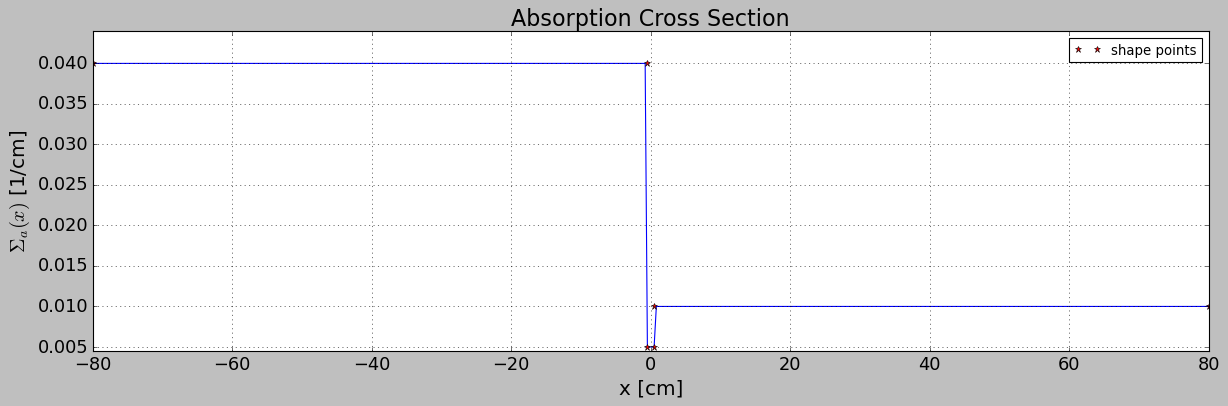

In [38]:
'''Absoption cross section function'''
from engy_5310.toolkit import TargetFunction  

shape_pts = [(x_a, sigma_a_3), (-x_s, sigma_a_3), 
             (-x_s, sigma_a_2), (x_s, sigma_a_2), 
             (x_s, sigma_a_1), (x_b, sigma_a_1)]

sigma_a = TargetFunction(shape_pts, type='linear')
  
sigma_a.plot(n_plot_pts=500, show_shape_pts=True, 
             title='Absorption Cross Section', y_label=r'$\Sigma_a(x)$ [1/cm]', x_label='x [cm]', 
             x_scale=1/unit.cm, y_scale=unit.cm,
             ylim=[min(sigma_a_1, sigma_a_2, sigma_a_3)*unit.cm*.9, 
                   max(sigma_a_1, sigma_a_2, sigma_a_3)*unit.cm*1.1])

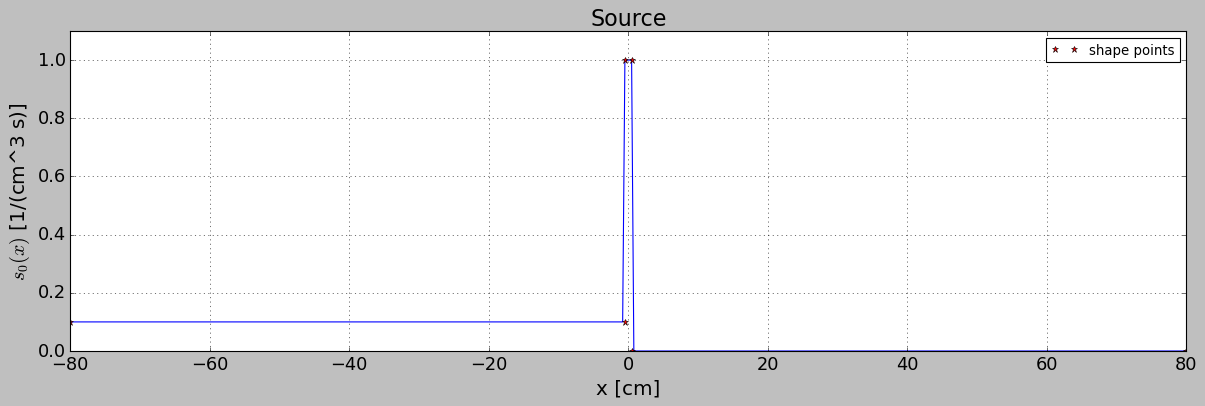

In [39]:
'''Source function'''
from engy_5310.toolkit import TargetFunction  

shape_pts = [(x_a, source_3), (-x_s, source_3), 
             (-x_s, source_2), (x_s, source_2), 
             (x_s, source_1), (x_b, source_1)]

source = TargetFunction(shape_pts, type='linear')
  
source.plot(n_plot_pts=500, show_shape_pts=True, 
             title='Source', y_label=r'$s_0(x)$ [1/(cm^3 s)]', x_label='x [cm]', 
             x_scale=1/unit.cm, y_scale=unit.cm**3*unit.second,
             ylim=[min(source_1, source_2, source_3)*unit.cm**3*unit.second*.9, 
                   max(source_1, source_2, source_3)*unit.cm**3*unit.second*1.1])

### [Finite Element Basis Functions](#toc)<a id="fembf-unsym"></a>

Specify basis functions distribution on the material domain and degree.

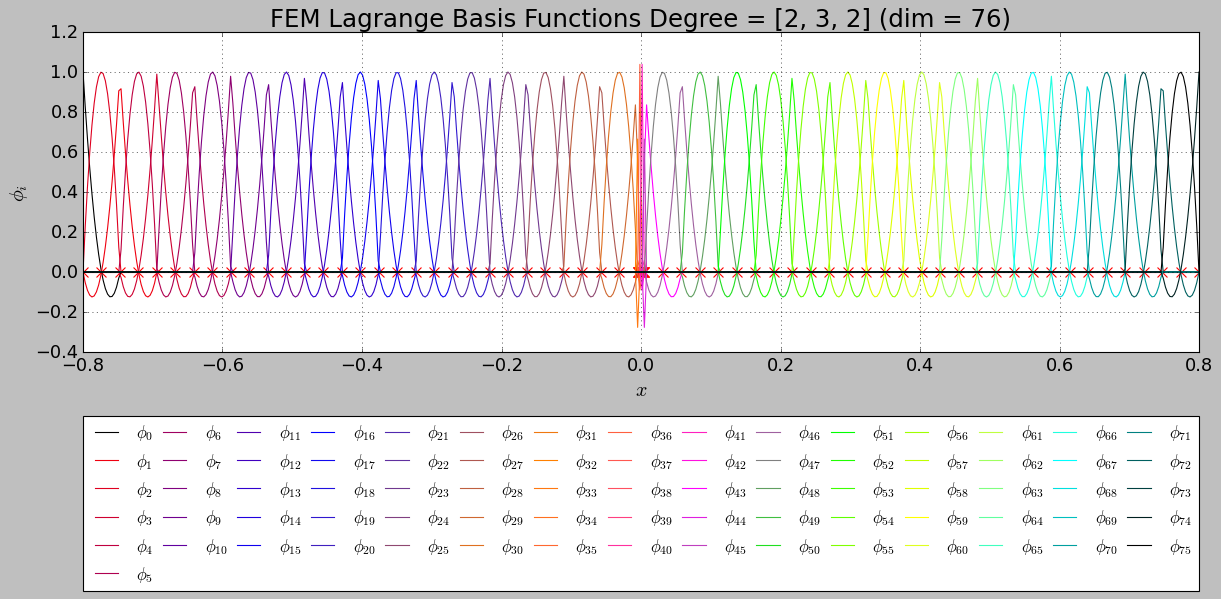

In [40]:
'''Build basis functions'''
from engy_5310.toolkit import LagrangeFEMBasis 

degree = [2,3,2]
n_elem = [15,5,15] # make sure to use an odd number of element in the central source domain

femlb = LagrangeFEMBasis(degree=degree, n_elem=n_elem, x_partition=[x_a, -x_s, x_s, x_b])
femlb.plot(n_plot_pts=500, n_legend_cols=15)

  + $A_{i,j} = (D\,\phi'_j,\phi'_i) + (\Sigma_a\,\phi_j,\phi_i) $

In [41]:
'''Build the matrix of coefficients of the linear system'''

d_mtrx = femlb.inner_product_matrix(diffusion_coeff, "u'", "v'")
sa_mtrx = femlb.inner_product_matrix(sigma_a, 'u', 'v')

a_mtrx = d_mtrx + sa_mtrx

In [42]:
try:    
    from engy_5310.toolkit import matrix_rank
except ModuleNotFoundError:
    assert False, 'You need to provide your own code here. Bailing out.'
    
if matrix_rank(a_mtrx) == min(a_mtrx.shape):
    print('matrix is full rank.')
else:
    print('matrix is rank deficient.')

matrix is full rank.


  + $b_i = (s_0,\phi_i) - q_{na}\,\phi_i(a) - q_{nb}\,\phi_i(b)$

In [43]:
'''Build the load vector'''

s_vec = femlb.inner_product_vector(source, 'v')
#qa_vec = femlb.boundary_inner_product_vector('left', lambda x: q_na, 'v')  # left side inner product is incorrect FIX (TODO)
qb_vec = femlb.boundary_inner_product_vector('right', lambda x: q_nb, 'v')

'''Build load vector (using global basis functions)'''
# Too slow (keep for information)
import numpy as np
n = len(femlb.basis_func_list)
b_vec = np.zeros(n, dtype=np.float64)
for i, phi_i in enumerate(femlb.basis_func_list):
    b_vec[i] = q_na * phi_i(x_a)
    
#b_vec = s_vec - qa_vec - qb_vec
b_vec = s_vec - b_vec - qb_vec

In [44]:
'''Compute coefficients of the finite element basis linear combination'''
import numpy as np

c_star_vec = np.linalg.solve(a_mtrx, b_vec)

### [Results](#toc)<a id="results-unsym"></a>

Much can be exercised in terms of results by varying the parameters of the problem.

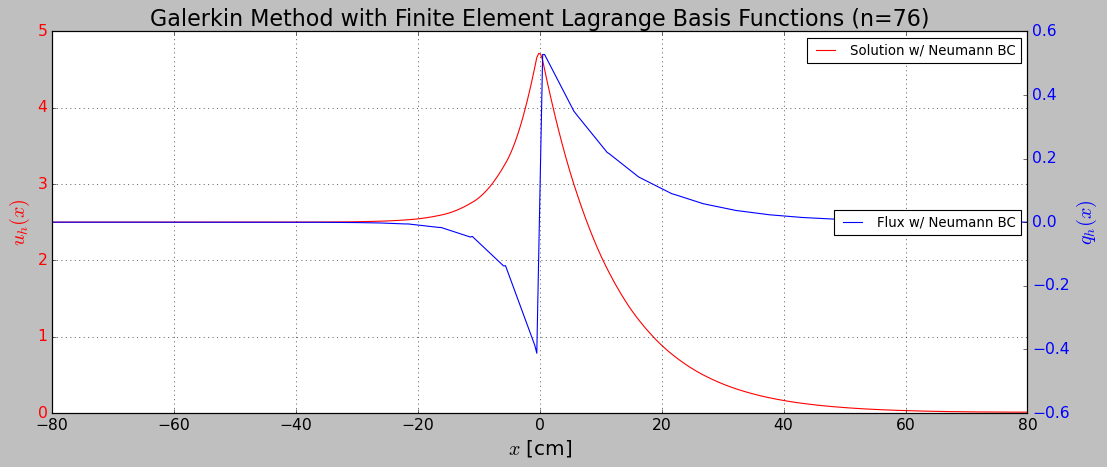

In [45]:
n_pts = 500
x = np.linspace(x_a, x_b, n_pts)
u_values = u_star(x)
q_values = -diffusion_coeff(x)*u_prime_star(x)

plot_solution(x, u_values, q_values)

In [46]:
'''Rayleigh-Ritz solution evaluated at the boundaries'''

np.set_printoptions(precision=5)
print('u^*_N(a) [cm^2/s]= ', u_star(x_a)*unit.cm**2*unit.second, '  u^*_N(b) [cm^2/s]= ', u_star(x_b)*unit.cm**2*unit.second)
print("u^*'_N(a) [cm/s]= ", u_prime_star(x_a)*unit.cm*unit.second, " u^*'_N(b) [cm/s]= ", u_prime_star(x_b)*unit.cm*unit.second)
print('u^*_N(0) [cm^2/s]= ', u_star(0.0)*unit.cm**2*unit.second)
print("u^*'_N(0) [cm/s]= ", u_prime_star(0.0)*unit.cm*unit.second)

u^*_N(a) [cm^2/s]=  [2.5]   u^*_N(b) [cm^2/s]=  [0.01115]
u^*'_N(a) [cm/s]=  [-4.63585e-05]  u^*'_N(b) [cm/s]=  [0.0286]
u^*_N(0) [cm^2/s]=  [4.71394]
u^*'_N(0) [cm/s]=  [-383.78819]


In [47]:
'''Flux at left boundary'''

print('q_na given    [cm2/s]= ', q_na)
print('q_na computed [cm2/s]= ', -(-diffusion_coeff(x_a)*u_prime_star(x_a))*unit.cm**2*unit.second)
#print('flux error [%]= ',(diffusion_coeff(x_a)*u_prime_star(x_a) - q_na)/q_na*100*unit.cm**2*unit.second)

q_na given    [cm2/s]=  0.0
q_na computed [cm2/s]=  [-4.63585e-09]


In [48]:
'''Flux at right boundary'''

print('q_nb given    [cm^2/s]= ', q_nb)
print('q_nb computed [cm^2/s]= ', -diffusion_coeff(x_b)*u_prime_star(x_b)*unit.cm**2*unit.second)
#print('flux error [%]= ',(-diffusion_coeff(x_b)*u_prime_star(x_b) - q_nb)/q_nb*100*unit.cm**2*unit.second)

q_nb given    [cm^2/s]=  0.0
q_nb computed [cm^2/s]=  [-4.00377e-06]


In [49]:
x_vec = np.linspace(x_a, x_b, 40)
u_n_vec = u_star(x_vec)*unit.cm**2*unit.second
q_N_vec = -diffusion_coeff(x_vec)*u_prime_star(x_vec)*unit.cm**2*unit.second

print('x [cm]        u_n [#/cm^2/s]    q_N [#/cm^2/s]')
for (x, u_n, q_N) in zip(x_vec/unit.cm, u_n_vec, q_N_vec):
    print('%+2.5e   %+2.5e     %+2.5e'%(x, u_n, q_N))

x [cm]        u_n [#/cm^2/s]    q_N [#/cm^2/s]
-8.00000e+01   +2.50000e+00     +4.63585e-09
-7.58974e+01   +2.50000e+00     -1.00147e-07
-7.17949e+01   +2.50000e+00     -2.81244e-07
-6.76923e+01   +2.50000e+00     -6.49186e-07
-6.35897e+01   +2.50001e+00     -1.33927e-06
-5.94872e+01   +2.50002e+00     -3.20576e-06
-5.53846e+01   +2.50004e+00     -7.67602e-06
-5.12821e+01   +2.50008e+00     -1.76081e-05
-4.71795e+01   +2.50019e+00     -3.77202e-05
-4.30769e+01   +2.50044e+00     -8.24439e-05
-3.89744e+01   +2.50099e+00     -2.00089e-04
-3.48718e+01   +2.50224e+00     -4.68424e-04
-3.07692e+01   +2.50503e+00     -1.03774e-03
-2.66667e+01   +2.51145e+00     -2.08989e-03
-2.25641e+01   +2.52636e+00     -5.18187e-03
-1.84615e+01   +2.55969e+00     -1.23398e-02
-1.43590e+01   +2.63400e+00     -2.80783e-02
-1.02564e+01   +2.80241e+00     -5.93273e-02
-6.15385e+00   +3.19787e+00     -1.33460e-01
-2.05128e+00   +4.08886e+00     -3.22444e-01
+2.05128e+00   +4.04888e+00     +4.80697e-01
+6.15385

In [50]:
x_vec

array([-0.8    , -0.75897, -0.71795, -0.67692, -0.6359 , -0.59487,
       -0.55385, -0.51282, -0.47179, -0.43077, -0.38974, -0.34872,
       -0.30769, -0.26667, -0.22564, -0.18462, -0.14359, -0.10256,
       -0.06154, -0.02051,  0.02051,  0.06154,  0.10256,  0.14359,
        0.18462,  0.22564,  0.26667,  0.30769,  0.34872,  0.38974,
        0.43077,  0.47179,  0.51282,  0.55385,  0.59487,  0.6359 ,
        0.67692,  0.71795,  0.75897,  0.8    ])

In [51]:
u_n_vec

array([2.5    , 2.5    , 2.5    , 2.5    , 2.50001, 2.50002, 2.50004,
       2.50008, 2.50019, 2.50044, 2.50099, 2.50224, 2.50503, 2.51145,
       2.52636, 2.55969, 2.634  , 2.80241, 3.19787, 4.08886, 4.04888,
       2.8619 , 2.02109, 1.42941, 1.01143, 0.71528, 0.5052 , 0.35713,
       0.25274, 0.17888, 0.12654, 0.08955, 0.06359, 0.04534, 0.03255,
       0.02368, 0.01773, 0.01394, 0.01182, 0.01115])

In [52]:
q_N_vec

array([ 4.63585e-09, -1.00147e-07, -2.81244e-07, -6.49186e-07,
       -1.33927e-06, -3.20576e-06, -7.67602e-06, -1.76081e-05,
       -3.77202e-05, -8.24439e-05, -2.00089e-04, -4.68424e-04,
       -1.03774e-03, -2.08989e-03, -5.18187e-03, -1.23398e-02,
       -2.80783e-02, -5.93273e-02, -1.33460e-01, -3.22444e-01,
        4.80697e-01,  3.35500e-01,  2.38347e-01,  1.70410e-01,
        1.20460e-01,  8.43628e-02,  5.90172e-02,  4.24301e-02,
        3.01229e-02,  2.11656e-02,  1.47414e-02,  1.05046e-02,
        7.46744e-03,  5.22935e-03,  3.60019e-03,  2.45032e-03,
        1.64150e-03,  9.97509e-04,  4.67134e-04, -4.00377e-06])

In [53]:
'''Save text file with values'''

x_vec = np.linspace(x_a, x_b, 5000)
u_n_vec = u_star(x_vec)*unit.cm**2*unit.second
q_N_vec = -diffusion_coeff(x_vec)*u_prime_star(x_vec)*unit.cm**2*unit.second

np.savetxt('data/plane-source-unsym-inf.txt', (x_vec/unit.cm, u_n_vec, q_N_vec), delimiter=' ', fmt='%2.6e') 

# For reading do: (x,u,q) = np.loadtxt('line-source-inf.txt')

## ["Plane Source" in a Finite Domain w/ Vacuum Boundary](#toc)<a id="vac-case"></a>

Consider a source with finite thickness surrounded by two different material regions exposed to vacuum. 

The normal flux boundary conditions are as follows:

\begin{align*}
 q_n(a) &= \frac{u}{2}, \\
 q_n(b) &= \frac{u}{2}.
\end{align*}

In [54]:
'''Domain'''
x_a = -25*unit.cm  # infinity
x_b = +25*unit.cm  # infinity
x_s = 0.5*unit.cm  # thickness of source (2*x_s)

In [55]:
plo = show_domain(x_a, x_s, x_b, zoom=1.5)

ViewInteractiveWidget(height=400, layout=Layout(height='auto', width='100%'), width=1000)

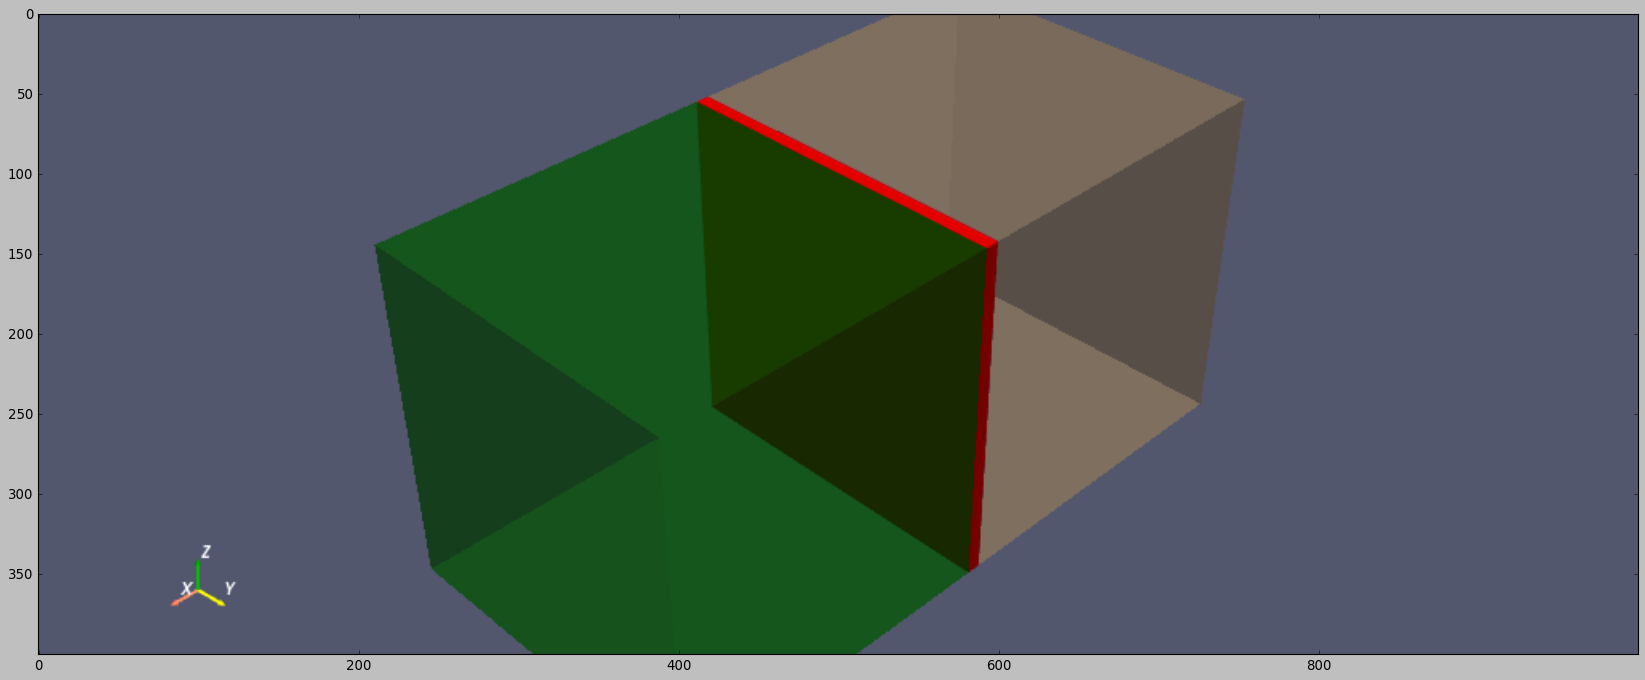

In [56]:
import matplotlib.pyplot as plt
plt.figure(1, figsize=(100, 10))
plt.imshow(plo.image)
plt.show()

### [Data](#toc)<a id="data-vac"></a>

Solve problem with parameter values:

> + a, b, s
> + $D_1$, $\Sigma_{a1}$, $s_{01}$
> + $D_2$, $\Sigma_{a2}$, $s_{02}$
> + $D_3$, $\Sigma_{a3}$, $s_{03}$


In [57]:
'''Parameters and data'''

# Left side material
diffusion_coeff_3 = 1.0*unit.cm
sigma_a_3 = 0.04/unit.cm
source_3 = 0.1/unit.cm**3/unit.second

# Right side material
diffusion_coeff_1 = 1.4*unit.cm
sigma_a_1 = 0.01/unit.cm
source_1 = 0./unit.cm**3/unit.second

# Source
diffusion_coeff_2 = 1.5*unit.cm
sigma_a_2 = 0.005/unit.cm
source_2_two_prime = 1./unit.cm**2/unit.second # enforce a given surface source
length = 2*x_s
source_2 = source_2_two_prime/length

In [58]:
print('s_2 [#/cm^3-s] = ', source_2*unit.cm**3*unit.second)

s_2 [#/cm^3-s] =  1.0000000000000002


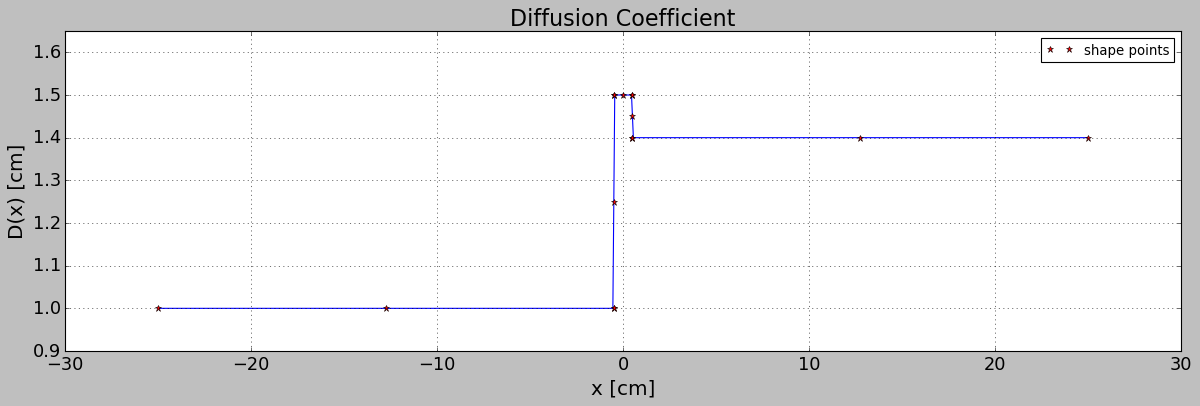

In [59]:
'''Diffusion coefficient function'''
from engy_5310.toolkit import TargetFunction   

a = np.linspace(x_a, -x_s, 3)
a_pts = [(x, diffusion_coeff_3) for x in a]

b = np.linspace(diffusion_coeff_3, diffusion_coeff_2, 3)
b_pts = [(-x_s, y) for y in b]

c = np.linspace(-x_s, x_s, 3)
c_pts = [(x, diffusion_coeff_2) for x in c]

d = np.linspace(diffusion_coeff_2, diffusion_coeff_1, 3)
d_pts = [(x_s, y) for y in d]

e = np.linspace(x_s, x_b, 3)
e_pts = [(x, diffusion_coeff_1) for x in e]

shape_pts = a_pts + b_pts + c_pts + d_pts + e_pts

#shape_pts = [(x_a, diffusion_coeff_3), ((x_a-x_s)/2, diffusion_coeff_3),  (-x_s, diffusion_coeff_3), 
#             (-x_s, diffusion_coeff_2), (x_s, diffusion_coeff_2), 
#             (x_s, diffusion_coeff_1), (x_b, diffusion_coeff_1)]

diffusion_coeff = TargetFunction(shape_pts, type='linear')
  
diffusion_coeff.plot(n_plot_pts=500, show_shape_pts=True, 
                title='Diffusion Coefficient', y_label=r'D(x) [cm]', x_label='x [cm]', 
                x_scale=1/unit.cm, y_scale=1/unit.cm,
                ylim=[min(diffusion_coeff_1, diffusion_coeff_2, diffusion_coeff_3)/unit.cm*.9, 
                      max(diffusion_coeff_1, diffusion_coeff_2, diffusion_coeff_3)/unit.cm*1.1])

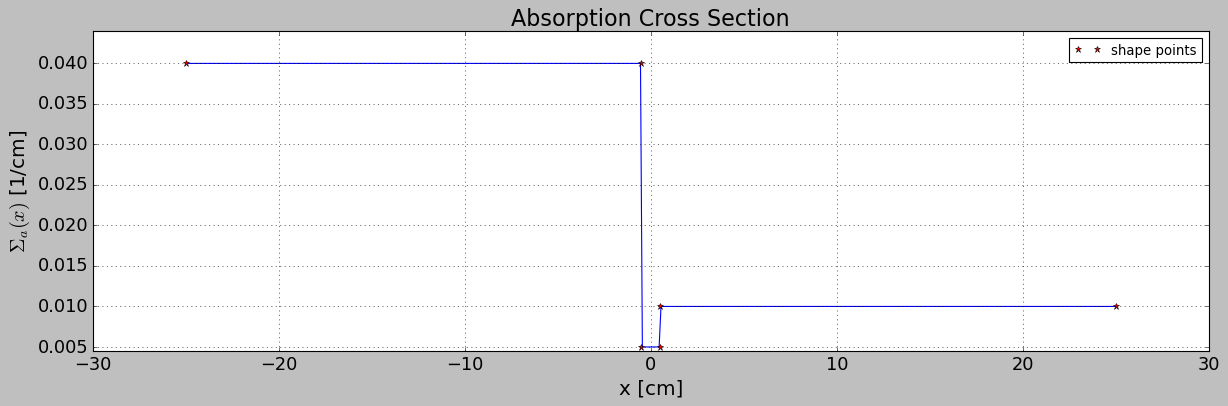

In [60]:
'''Absoption cross section function'''
from engy_5310.toolkit import TargetFunction  

shape_pts = [(x_a, sigma_a_3), (-x_s, sigma_a_3), 
             (-x_s, sigma_a_2), (x_s, sigma_a_2), 
             (x_s, sigma_a_1), (x_b, sigma_a_1)]

sigma_a = TargetFunction(shape_pts, type='linear')
  
sigma_a.plot(n_plot_pts=500, show_shape_pts=True, 
             title='Absorption Cross Section', y_label=r'$\Sigma_a(x)$ [1/cm]', x_label='x [cm]', 
             x_scale=1/unit.cm, y_scale=unit.cm,
             ylim=[min(sigma_a_1, sigma_a_2, sigma_a_3)*unit.cm*.9, 
                   max(sigma_a_1, sigma_a_2, sigma_a_3)*unit.cm*1.1])

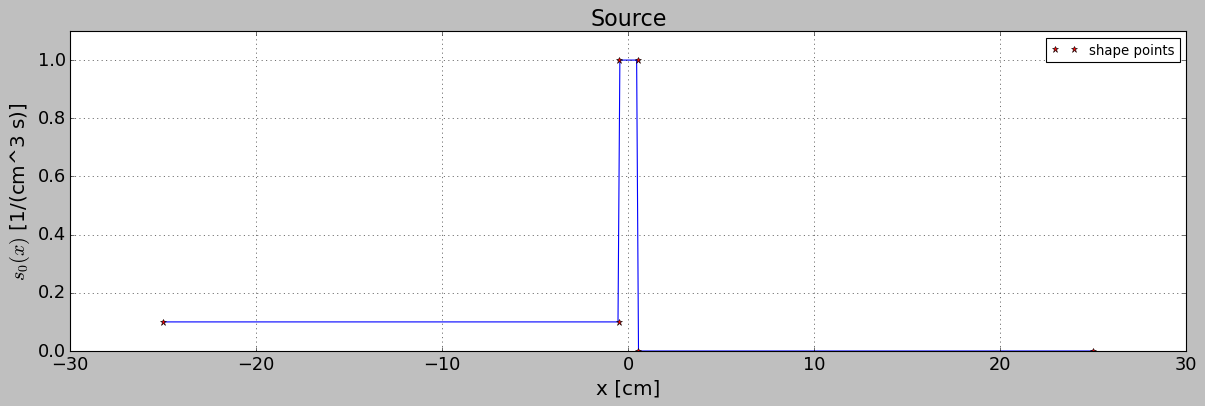

In [61]:
'''Source function'''
from engy_5310.toolkit import TargetFunction  

shape_pts = [(x_a, source_3), (-x_s, source_3), 
             (-x_s, source_2), (x_s, source_2), 
             (x_s, source_1), (x_b, source_1)]

source = TargetFunction(shape_pts, type='linear')
  
source.plot(n_plot_pts=500, show_shape_pts=True, 
             title='Source', y_label=r'$s_0(x)$ [1/(cm^3 s)]', x_label='x [cm]', 
             x_scale=1/unit.cm, y_scale=unit.cm**3*unit.second,
             ylim=[min(source_1, source_2, source_3)*unit.cm**3*unit.second*.9, 
                   max(source_1, source_2, source_3)*unit.cm**3*unit.second*1.1])

### [Finite Element Basis Functions](#toc)<a id="fembf-vac"></a>

Specify basis functions distribution on the material domain and degree.

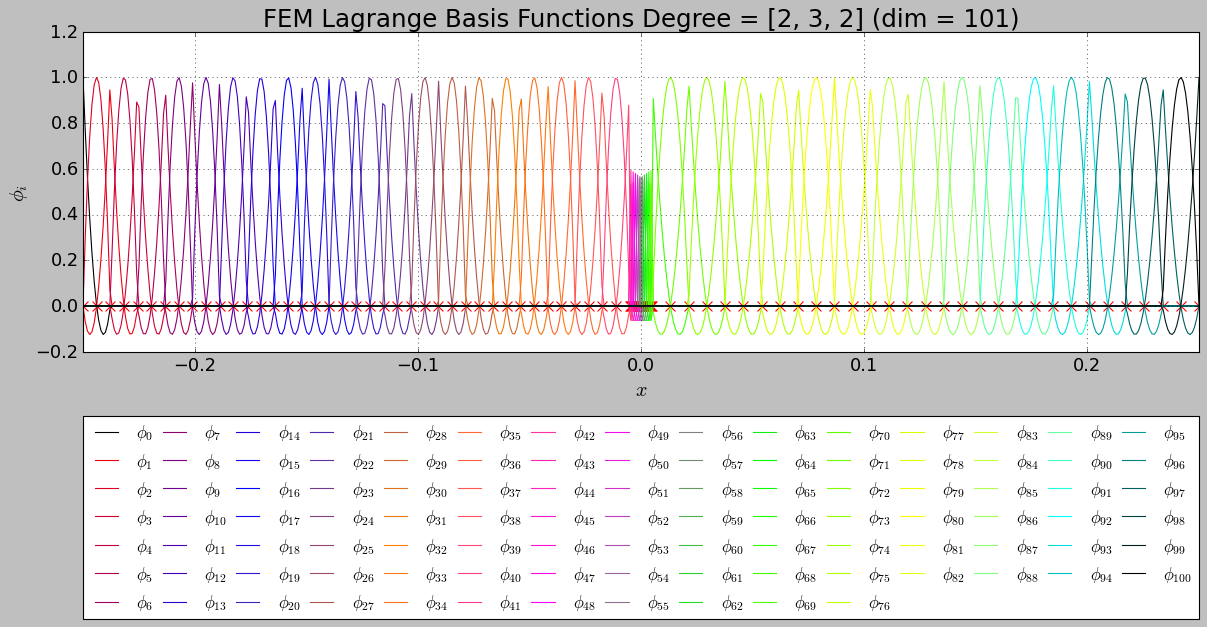

In [62]:
'''Build basis functions'''
from engy_5310.toolkit import LagrangeFEMBasis 

degree = [2,3,2]
n_elem = [20,10,15] # make sure to use an odd number of element in the central source domain

femlb = LagrangeFEMBasis(degree=degree, n_elem=n_elem, x_partition=[x_a, -x_s, x_s, x_b])
femlb.plot(n_plot_pts=500, n_legend_cols=15)

  + $A_{i,j} = (D\,\phi'_j,\phi'_i) + (\Sigma_a\,\phi_j,\phi_i) + 1/2\,\phi_j(a)\,\phi_i(a) + 1/2\,\phi_j(b)\,\phi_i(b) $

In [63]:
'''Build the matrix of coefficients of the linear system'''

d_mtrx = femlb.inner_product_matrix(diffusion_coeff, "u'", "v'")
sa_mtrx = femlb.inner_product_matrix(sigma_a, 'u', 'v')

#r_mtrx_a = femlb.boundary_inner_product_matrix('left', lambda x:1/2, 'u', 'v') # incorrect left inner product fix (TODO)

import numpy as np
n = len(femlb.basis_func_list)
r_mtrx_a = np.zeros((n, n), dtype=np.float64)

for i,phi_i in enumerate(femlb.basis_func_list):
    for j,phi_j in enumerate(femlb.basis_func_list):
        r_mtrx_a[i,j] = 1/2 * phi_j(x_a) * phi_i(x_a)    

r_mtrx_b = femlb.boundary_inner_product_matrix('right', lambda x:1/2, 'u', 'v')

a_mtrx = d_mtrx + sa_mtrx + r_mtrx_a + r_mtrx_b

In [64]:
try:    
    from engy_5310.toolkit import matrix_rank
except ModuleNotFoundError:
    assert False, 'You need to provide your own code here. Bailing out.'
    
if matrix_rank(a_mtrx) == min(a_mtrx.shape):
    print('matrix is full rank.')
else:
    print('matrix is rank deficient.')

matrix is full rank.


  + $b_i = (s_0,\phi_i)$

In [65]:
'''Build the load vector'''

s_vec = femlb.inner_product_vector(source, 'v')
b_vec = s_vec

In [66]:
'''Compute coefficients of the finite element basis linear combination'''
import numpy as np

c_star_vec = np.linalg.solve(a_mtrx, b_vec)

### [Results](#toc)<a id="results-vac"></a>

Much can be exercised in terms of results by varying the parameters of the problem.

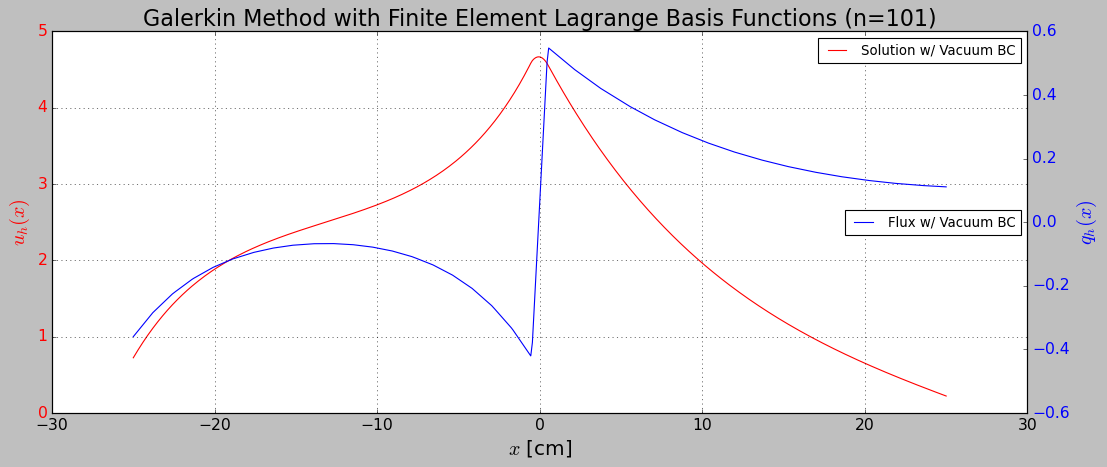

In [67]:
n_pts = 500
x = np.linspace(x_a, x_b, n_pts)
u_values = u_star(x)
q_values = -diffusion_coeff(x)*u_prime_star(x)

plot_solution(x, u_values, q_values, u_legend='Solution w/ Vacuum BC', q_legend='Flux w/ Vacuum BC')

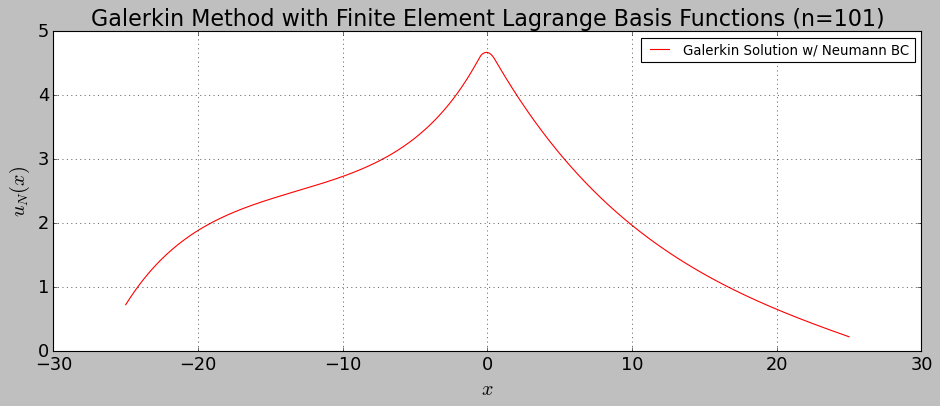

In [68]:
'''Rayleigh Ritz Method with Lagrange Basis Functions'''

n_pts = 500
x = np.linspace(x_a, x_b, n_pts)
u_values = u_star(x)

import matplotlib.pyplot as plt
#%matplotlib inline
#plt.style.use('dark_background')
plt.figure(1, figsize=(14, 5))

plt.plot(x/unit.cm, u_values*unit.cm**2*unit.second, 'r-', label='Galerkin Solution w/ Neumann BC')

plt.title(r'Galerkin Method with Finite Element Lagrange Basis Functions (n='+str(len(femlb.basis_func_list))+')', fontsize=20)
plt.ylabel(r'$u_N(x)$', fontsize=18)
plt.xlabel(r'$x$', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc='best',fontsize=12)
plt.grid(True)
plt.show()

In [69]:
'''Rayleigh-Ritz solution evaluated at the boundaries'''

np.set_printoptions(precision=5)
print('u^*_N(a) [cm^2/s]= ', u_star(x_a)*unit.cm**2*unit.second, '  u^*_N(b) [cm^2/s]= ', u_star(x_b)*unit.cm**2*unit.second)
print("u^*'_N(a) [cm/s]= ", u_prime_star(x_a)*unit.cm*unit.second, " u^*'_N(b) [cm/s]= ", u_prime_star(x_b)*unit.cm*unit.second)
print('u^*_N(0) [cm^2/s]= ', u_star(0.0)*unit.cm**2*unit.second)
print("u^*'_N(0) [cm/s]= ", u_prime_star(0.0)*unit.cm*unit.second)

u^*_N(a) [cm^2/s]=  [0.7233]   u^*_N(b) [cm^2/s]=  [0.22241]
u^*'_N(a) [cm/s]=  [3600.02392]  u^*'_N(b) [cm/s]=  [-793.02311]
u^*_N(0) [cm^2/s]=  [4.66504]
u^*'_N(0) [cm/s]=  [-414.43704]


In [70]:
'''Flux at left boundary'''

print('q_na given    [cm2/s]= ', u_star(x_a)/2*unit.cm**2*unit.second)
print('q_na computed [cm2/s]= ', -(-diffusion_coeff(x_a)*u_prime_star(x_a))*unit.cm**2*unit.second)
#print('flux error [%]= ',(diffusion_coeff(x_a)*u_prime_star(x_a) - q_na)/q_na*100*unit.cm**2*unit.second)

q_na given    [cm2/s]=  [0.36165]
q_na computed [cm2/s]=  [0.36]


In [71]:
'''Flux at right boundary'''

print('q_nb given    [cm^2/s]= ', u_star(x_b)/2*unit.cm**2*unit.second)
print('q_nb computed [cm^2/s]= ', -diffusion_coeff(x_b)*u_prime_star(x_b)*unit.cm**2*unit.second)
#print('flux error [%]= ',(-diffusion_coeff(x_b)*u_prime_star(x_b) - q_nb)/q_nb*100*unit.cm**2*unit.second)

q_nb given    [cm^2/s]=  [0.1112]
q_nb computed [cm^2/s]=  [0.11102]


In [77]:
x_vec = np.linspace(x_a, x_b, 40)
u_n_vec = u_star(x_vec)*unit.cm**2*unit.second
q_N_vec = -diffusion_coeff(x_vec)*u_prime_star(x_vec)*unit.cm**2*unit.second

print('x [cm]        u_n [#/cm^2/s]    q_N [#/cm^2/s]')
for (x, u_n, q_N) in zip(x_vec, u_n_vec, q_N_vec):
    print('%+2.5e   %+2.5e     %+2.5e'%(x/unit.cm, u_n, q_N))

x [cm]        u_n [#/cm^2/s]    q_N [#/cm^2/s]
-2.50000e+01   +7.23298e-01     -3.60002e-01
-2.37179e+01   +1.13326e+00     -2.80543e-01
-2.24359e+01   +1.45291e+00     -2.19438e-01
-2.11538e+01   +1.70337e+00     -1.72702e-01
-1.98718e+01   +1.90118e+00     -1.37286e-01
-1.85897e+01   +2.05942e+00     -1.10880e-01
-1.73077e+01   +2.18853e+00     -9.17575e-02
-1.60256e+01   +2.29706e+00     -7.86708e-02
-1.47436e+01   +2.39217e+00     -7.07647e-02
-1.34615e+01   +2.48015e+00     -6.75234e-02
-1.21795e+01   +2.56683e+00     -6.87360e-02
-1.08974e+01   +2.65792e+00     -7.44837e-02
-9.61538e+00   +2.75945e+00     -8.51443e-02
-8.33333e+00   +2.87814e+00     -1.01417e-01
-7.05128e+00   +3.02183e+00     -1.24370e-01
-5.76923e+00   +3.20001e+00     -1.55506e-01
-4.48718e+00   +3.42447e+00     -1.96864e-01
-3.20513e+00   +3.71004e+00     -2.51150e-01
-1.92308e+00   +4.07559e+00     -3.21912e-01
-6.41026e-01   +4.54527e+00     -4.13775e-01
+6.41026e-01   +4.50784e+00     +5.43768e-01
+1.92308

In [78]:
x_vec/unit.cm

array([-25.     , -23.71795, -22.4359 , -21.15385, -19.87179, -18.58974,
       -17.30769, -16.02564, -14.74359, -13.46154, -12.17949, -10.89744,
        -9.61538,  -8.33333,  -7.05128,  -5.76923,  -4.48718,  -3.20513,
        -1.92308,  -0.64103,   0.64103,   1.92308,   3.20513,   4.48718,
         5.76923,   7.05128,   8.33333,   9.61538,  10.89744,  12.17949,
        13.46154,  14.74359,  16.02564,  17.30769,  18.58974,  19.87179,
        21.15385,  22.4359 ,  23.71795,  25.     ])

In [74]:
u_n_vec

array([0.7233 , 1.13326, 1.45291, 1.70337, 1.90118, 2.05942, 2.18853,
       2.29706, 2.39217, 2.48015, 2.56683, 2.65792, 2.75945, 2.87814,
       3.02183, 3.20001, 3.42447, 3.71004, 4.07559, 4.54527, 4.50784,
       4.03486, 3.60946, 3.22653, 2.88149, 2.57021, 2.28913, 2.03505,
       1.80489, 1.59591, 1.40562, 1.23189, 1.07268, 0.92607, 0.79031,
       0.66381, 0.54515, 0.43292, 0.32577, 0.22241])

In [75]:
q_N_vec

array([-0.36   , -0.28054, -0.21944, -0.1727 , -0.13729, -0.11088,
       -0.09176, -0.07867, -0.07076, -0.06752, -0.06874, -0.07448,
       -0.08514, -0.10142, -0.12437, -0.15551, -0.19686, -0.25115,
       -0.32191, -0.41377,  0.54377,  0.48922,  0.44079,  0.39706,
        0.35768,  0.32228,  0.2916 ,  0.26411,  0.23948,  0.21748,
        0.19812,  0.1815 ,  0.16681,  0.15394,  0.14276,  0.13352,
        0.12591,  0.11966,  0.11472,  0.11102])

In [76]:
'''Save text file with values'''

x_vec = np.linspace(x_a, x_b, 5000)
u_n_vec = u_star(x_vec)*unit.cm**2*unit.second
q_N_vec = -diffusion_coeff(x_vec)*u_prime_star(x_vec)*unit.cm**2*unit.second

np.savetxt('data/plane-source-unsym-vac.txt', (x_vec/unit.cm, u_n_vec, q_N_vec), delimiter=' ', fmt='%2.6e') 

# For reading do: (x,u,q) = np.loadtxt('line-source-inf.txt')